In [1]:
import requests
import os
import pyunpack
import pandas as pd
import re
import numpy as np
# This command will basically import all the modules from pycaret that are necessary for classification tasks
from pycaret.classification import *

In [2]:
X_train = np.load('/home/karim/Interviews/Celonis/data/X_test.npy')
y_train = np.load('/home/karim/Interviews/Celonis/data/y_test.npy')

X_test = np.load('/home/karim/Interviews/Celonis/data/X_train.npy')
y_test = np.load('/home/karim/Interviews/Celonis/data/y_train_y.npy')

assert len(X_train) == len(y_train)
assert len(X_test) == len(y_test)

In [3]:
import pandas as pd
df = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train, columns=['gesture'])
X_train = pd.concat([df, y_train], ignore_index=False, axis=1).reset_index(drop=True)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,gesture
0,1.558220,1.558220,1.558220,1.558220,1.558220,1.558220,1.558220,1.558220,1.558220,1.558220,1.558220,1.558220,1.558220,1.558220,1.558220,1.558220,1.558220,1.558220,1.558220,1.558220,1.558220,1.558220,1.558220,1.558220,1.558220,1.558220,1.558220,1.558220,1.558220,1.558220,1.558220,1.558220,1.558220,1.558220,1.554170,1.535349,1.511167,1.468821,1.426475,1.384129,1.341783,1.299437,1.267596,1.264773,1.262736,1.262736,1.262736,1.262736,1.262736,1.262736,1.262736,1.262736,1.262736,1.262736,1.262736,1.262736,1.262736,1.262736,1.262736,1.262736,1.262736,1.262736,1.262736,1.262736,1.262736,1.262736,1.262736,1.262736,1.262736,1.262736,1.262736,1.262736,1.262736,1.262736,1.262736,1.262736,1.262736,1.262736,1.262736,1.262736,1.262736,1.262736,1.262736,1.262736,1.262736,1.262736,1.262736,1.262736,1.262736,1.262736,1.254160,1.239103,1.208157,1.165810,1.123464,1.081118,1.038772,0.996425,0.931899,0.853794,0.771519,0.686827,0.602135,0.517442,0.442041,0.371463,0.319826,0.277480,0.235134,0.192787,0.150441,0.108095,0.323811,0.112081,-0.099651,-0.311383,-0.103636,-0.145983,-0.178490,-0.207662,-0.214678,-0.214678,-0.214678,-0.214678,-0.214678,-0.214678,-0.241693,-0.275571,-0.316309,-0.358655,-0.401001,-0.443347,-0.495914,-0.550494,-0.630613,-0.715305,-0.799997,-0.884689,-0.969383,-1.054075,-1.080399,-1.099220,-1.101126,-1.101126,-1.101126,-1.101126,-1.085474,-1.068536,-1.007965,-0.944445,-0.880925,-0.817407,-0.753887,-0.690367,-0.626849,-0.563329,-0.499809,-0.436290,-0.372771,-0.309382,-0.256214,-0.203856,-0.182683,-0.161510,-0.140336,-0.119164,-0.494882,-0.398843,-0.448247,-0.099402,-0.120575,-0.141748,-0.162921,-0.185047,-0.215631,-0.249966,-0.313486,-0.377006,-0.440524,-0.504044,-0.567564,-0.626509,-0.659915,-0.691308,-0.712482,-0.733654,-0.754828,-0.776001,-0.797174,-0.818348,-0.839520,-0.860694,-0.881866,-0.903040,-0.924213,-0.941878,-0.948465,-0.953385,-0.953385,-0.953385,-0.953385,-0.953385,-0.953385,-0.953385,-0.953385,-0.953385,-0.953385,-0.953385,-0.953385,-0.944093,-0.915863,-0.882807,-0.840461,-0.798115,-0.755769,-0.712214,-0.666574,-0.614144,-0.550625,-0.487105,-0.423586,-0.

In [4]:
import pandas as pd
df = pd.DataFrame(X_test)
y_test = pd.DataFrame(y_test, columns=['gesture'])
X_test = pd.concat([df, y_test], ignore_index=False, axis=1).reset_index(drop=True)
X_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,gesture
0,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,-0.249279,-0.186055,-0.348146,0.196885,0.140963,0.249969,0.311012,0.372056,0.372056,0.372056,0.372056,0.372056,0.372056,0.372056,0.372056,0.372056,0.372056,0.372056,0.372056,0.372056,0.372056,0.372056,0.372056,0.372056,0.372056,0.372056,0.372056,0.372056,0.372056,0.372056,0.372056,0.372056,0.372056,0.372056,0.372056,0.372056,0.372056,0.372056,0.372056,0.372056,0.372056,0.372056,0.372056,0.372056,0.372056,0.372056,0.372056,0.372056,0.372056,0.372056,0.397127,0.422199,0.476701,0.531204,0.585707,0.640210,0.677272,0.714334,0.714334,0.714334,0.714334,0.714334,0.714334,0.714334,0.714334,0.714334,0.714334,0.714334,0.714334,0.714334,0.714334,0.714334,0.714334,0.714334,0.714334,0.714334,0.665281,0.616228,0.561726,0.507223,0.452719,0.398217,0.343714,0.289210,0.234708,0.180205,0.125701,0.393093,0.120578,-0.151936,-0.424451,-0.146814,-0.201317,-0.255819,-0.284161,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,-0.349564,-0.386627,-0.495633,-0.604638,-0.713645,-0.822651,-0.920756,-1.018861,-1.073365,-1.127868,-1.182370,-1.236873,-1.297917,-1.358960,-1.522469,-1.685979,-1.849488,-2.012997,-2.176505,-2.340015,-2.453381,-2.566747,-2.675753,-2.784758,-2.893765,-3.002771,-2.941727,-2.880684,-2.771678,-2.662672,-2.553666,-2.444660,-2.265890,-2.087120,-1.869109,-1.651096,-1.433084,-1.215073,-0.997060,-0.779049,-0.561036,-0.343024,-0.125013,0.093000,0.271770,0.450540,0.559545,0.668552,0.777558,0.886563,0.995570,1.104576,1.213582,1.322587,1.431594,1.540600,1.640885,1.741170,1.741170,1.741170,1.741170,1.741170,1.741170,1.741170,1.741170,1.741170,1.741170,1.741170,1.741170,1.741170,1.653966,1.566761,1.457755,1.348750,1.239743,1.130737,1.021732,0.912726,0.803719,0.694713,0.585708,0.476701,0.424378,0.372056,0.372056,0.372056,0.372056,0.372056,0.372056,0.372056,0.372056,0.372056,0.372056,0.372056,0.385136,0.398217,0.452719,0.507223,0.561726,0.616228,0.665281,0.714334,0.714334,0.714334,0.714334,0.71433

In [5]:
# Setting up the classifier
# Pass the complete dataset as data and the featured to be predicted as target
clf=setup(data=X_train, target='gesture')

,Description,Value
0,session_id,5576
1,Target,gesture
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(3582, 946)"
5,Missing Values,0
6,Numeric Features,945
7,Categorical Features,0
8,Ordinal Features,0
9,High Cardinality Features,0


In [6]:
# This model will be used to compare all the model along with the cross validation
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9705,0.9981,0.9706,0.9713,0.9703,0.9662,0.9664,0.1110
rf,Random Forest Classifier,0.9585,0.9973,0.9586,0.9594,0.9582,0.9526,0.9528,0.3270
lightgbm,Light Gradient Boosting Machine,0.9581,0.9978,0.9579,0.9590,0.9578,0.9521,0.9523,2.3040
knn,K Neighbors Classifier,0.9481,0.9898,0.9492,0.9514,0.9479,0.9407,0.9413,0.2650
gbc,Gradient Boosting Classifier,0.9430,0.9964,0.9430,0.9441,0.9427,0.9348,0.9350,12.8050
nb,Naive Bayes,0.8764,0.9747,0.8773,0.8868,0.8785,0.8587,0.8596,0.1980
lr,Logistic Regression,0.8540,0.9799,0.8533,0.8569,0.8540,0.8331,0.8335,0.4430
lda,Linear Discriminant Analysis,0.8472,0.9770,0.8472,0.8527,0.8475,0.8254,0.8260,0.0490
dt,Decision Tree Classifier,0.8329,0.9045,0.8320,0.8356,0.8323,0.8089,0.8094,0.2520
ridge,Ridge Classifier,0.8201,0.0000,0.8192,0.8199,0.8136,0.7943,0.7959,0.1970


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=5576, verbose=0,
                     warm_start=False)

In [7]:
et=create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9880,0.9997,0.9876,0.9882,0.9880,0.9863,0.9864
1,0.9681,0.9940,0.9678,0.9693,0.9679,0.9636,0.9638
2,0.9681,0.9990,0.9693,0.9699,0.9682,0.9636,0.9638
3,0.9761,0.9992,0.9769,0.9772,0.9761,0.9727,0.9728
4,0.9522,0.9955,0.9517,0.9519,0.9517,0.9453,0.9454
5,0.9761,0.9989,0.9758,0.9761,0.9760,0.9727,0.9727
6,0.9681,0.9986,0.9685,0.9686,0.9681,0.9636,0.9636
7,0.9800,0.9994,0.9800,0.9810,0.9801,0.9771,0.9772
8,0.9640,0.9986,0.9644,0.9663,0.9632,0.9588,0.9594


In [8]:
# Whenenver we compare different models or build a model, the model uses deault
#hyperparameter values. Hence, we need to tune our model to get better performance

tuned_et=tune_model(et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9721,0.9989,0.9707,0.9727,0.9719,0.9681,0.9682
1,0.9562,0.9945,0.9556,0.9582,0.9556,0.9499,0.9503
2,0.9522,0.9957,0.9524,0.9530,0.9519,0.9453,0.9455
3,0.9482,0.9980,0.9496,0.9520,0.9486,0.9408,0.9413
4,0.9363,0.9888,0.9367,0.9363,0.9358,0.9271,0.9273
5,0.9482,0.9974,0.9484,0.9487,0.9479,0.9408,0.9409
6,0.9402,0.9971,0.9407,0.9419,0.9400,0.9317,0.9320
7,0.9560,0.9990,0.9563,0.9583,0.9556,0.9497,0.9501
8,0.9480,0.9958,0.9489,0.9505,0.9475,0.9406,0.9411


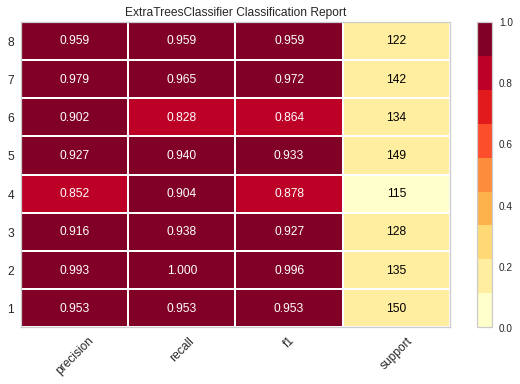

In [9]:
plot_model(tuned_et, plot='class_report')

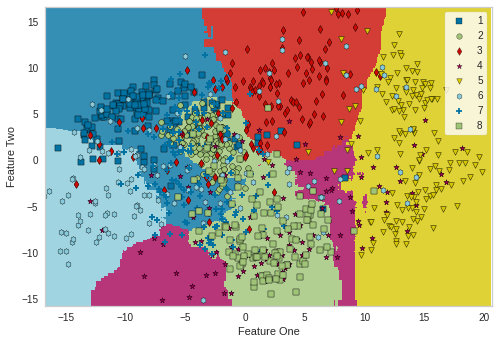

In [10]:
plot_model(tuned_et, plot='boundary')

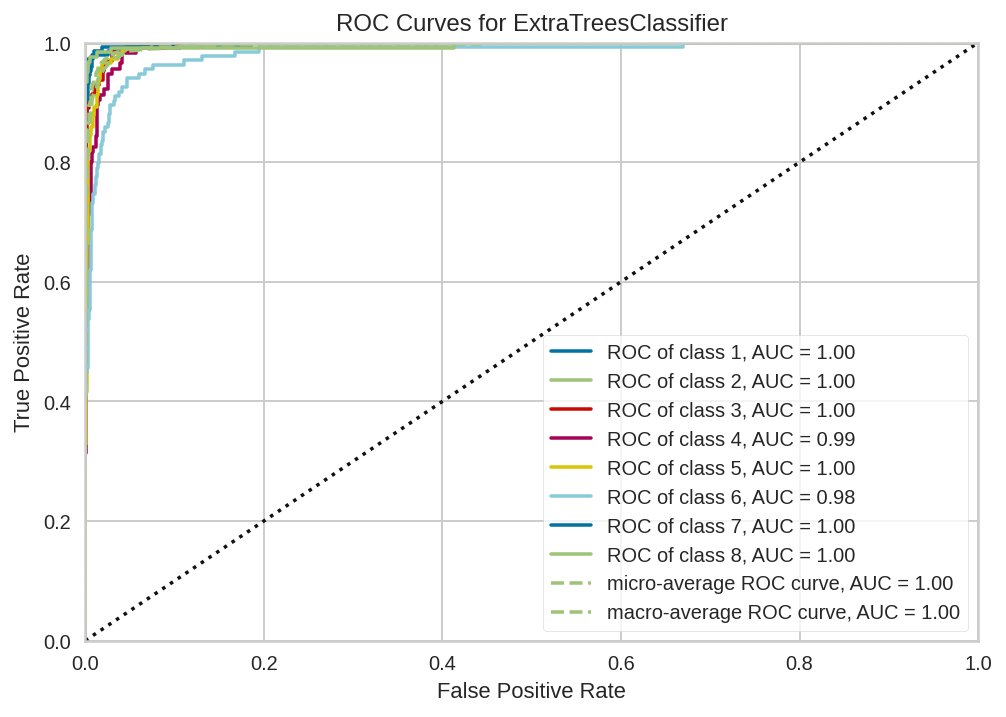

In [11]:
plot_model(tuned_et, plot='auc', scale = 2)

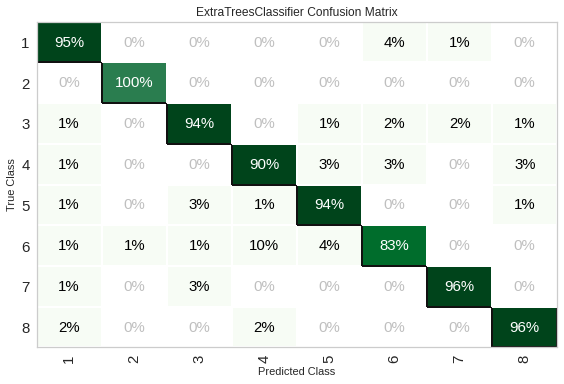

In [12]:
plot_model(tuned_et,plot='confusion_matrix', plot_kwargs = {'percent' : True})

In [13]:
# finalize the model
final_best = finalize_model(tuned_et)# save model to disk
save_model(final_best, 'tuned_et')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='gesture',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                  ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight={}, criterion='entropy',
                                       max_depth=7, max_features=1.0,
                                       max_leaf_nodes=Non

In [14]:
# predict on hold-out
#X_test_temp = X_test.drop('gesture', axis = 1, inplace = True)
predict_model(tuned_et, raw_score = True, data=X_test_temp)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9367,0.9953,0.9359,0.9370,0.9366,0.9276,0.9277


,32,35,38,40,42,45,47,48,50,51,...,gesture,Label,Score_0,Score_1,Score_2,Score_3,Score_4,Score_5,Score_6,Score_7
0,1.471502,1.374118,1.374118,1.374118,1.374118,1.321751,1.165568,1.091143,1.085639,1.085639,...,6,6,0.0581,0.0016,0.0057,0.0057,0.0013,0.9273,0.0004,0.0000
1,1.362087,1.362087,1.362087,1.362087,1.362087,1.362087,1.362087,1.362087,1.362087,1.362087,...,5,5,0.0000,0.0000,0.0003,0.1765,0.8152,0.0080,0.0000,0.0000
2,-0.734491,-0.734491,-0.734491,-0.734491,-0.734491,-0.734491,-0.723547,-0.679005,-0.516986,-0.435976,...,5,5,0.0000,0.0000,0.0473,0.0044,0.9273,0.0210,0.0000,0.0000
3,1.320444,1.320444,1.365866,1.471520,1.580077,1.613269,1.613269,1.613269,1.613269,1.613269,...,6,6,0.1334,0.0009,0.0103,0.1164,0.0058,0.7043,0.0168,0.0121
4,-0.842514,-0.851405,-0.851405,-0.851405,-0.851405,-0.851405,-0.851405,-0.851405,-0.851405,-0.851405,...,3,3,0.0003,0.0033,0.9598,0.0003,0.0234,0.0035,0.0093,0.0001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070,1.322008,1.322008,1.322008,1.322008,1.322008,1.322008,1.322008,1.322008,1.322008,1.322008,...,4,4,0.0000,0.0000,0.0000,0.9735,0.0131,0.0130,0.0000,0.0004
1071,0.447765,0.447765,0.447765,0.447765,0.447765,-0.155361,-0.118639,0.214093,0.208515,0.266617,...,6,6,0.0403,0.0242,0.1094,0.1735,0.0031,0.6460,0.0007,0.0028
1072,-1.488017,-1.437536,-1.427985,-1.427985,-1.427985,-1.414228,-1.378708,-1.360949,-1.349442,-1.349442,...,3,3,0.0009,0.0108,0.9410,0.0013,0.0078,0.0043,0.0243,0.0096
1073,-1.215486,-1.215486,-1.215486,-1.215486,-1.215486,-1.215486,-1.215486,-1.215486,-1.215486,-1.215486,...,6,6,0.0433,0.0009,0.0462,0.0031,0.0022,0.8931,0.0112,0.0000


In [ ]:
# # init setup
# from pycaret.classification import *
# clf1 = setup(data = X_train, target = 'gesture')

# # create a model
# lightgbm = create_model('lightgbm')

# predict on new data
predict_model(tuned_et, drift_report = True, data=X_test_temp)

In [1]:
import asyncio
asyncio.set_event_loop(asyncio.new_event_loop())

In [1]:
! python3 -m uvicorn app.main:app --reload

INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     Started reloader process [5374] using statreload
Transformation Pipeline and Model Successfully Loaded
INFO:     Started server process [5376]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     127.0.0.1:53480 - "GET /docs HTTP/1.1" 200 OK
INFO:     127.0.0.1:53480 - "GET /openapi.json HTTP/1.1" 200 OK
INFO:     127.0.0.1:53512 - "POST /predict?x=-0.16269899&y=0.23185817&z=0.88862506 HTTP/1.1" 200 OK
INFO:     127.0.0.1:53656 - "POST /predict HTTP/1.1" 422 Unprocessable Entity
INFO:     127.0.0.1:53686 - "POST /predict HTTP/1.1" 422 Unprocessable Entity
INFO:     127.0.0.1:53700 - "POST /predict HTTP/1.1" 422 Unprocessable Entity
INFO:     127.0.0.1:53712 - "GET /predict HTTP/1.1" 405 Method Not Allowed
INFO:     127.0.0.1:53712 - "GET /favicon.ico HTTP/1.1" 404 Not Found
INFO:     127.0.0.1:53712 - "GET /predict HTTP/1.1" 405 Method Not Allowed
INFO:     127.0.

In [37]:
to_predict_dict = {'x': -0.16269899,
                   'y': 0.23185817,
                   'z': 0.88862506}

# Apply one-hot encoding
to_predict = np.array(to_predict_dict)

In [38]:
to_predict

array({'x': -0.16269899, 'y': 0.23185817, 'z': 0.88862506}, dtype=object)

In [35]:
import requests
to_predict_dict = {'x': -0.16269899,
                   'y': 0.23185817,
                   'z': 0.88862506}

url = 'http://127.0.0.1:8000/predict'
r = requests.post(url,json=to_predict_dict); r.json()

{'prediction': 'error'}